In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score , classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
titanic_data=sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_data.shape

(891, 15)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic_data=titanic_data.drop(["deck"],axis=1)

In [ ]:
titanic_data["age"]=titanic_data["age"].fillna(titanic_data["age"].mean())

In [ ]:
titanic_data["embarked"].mode()

0    S
Name: embarked, dtype: object

In [ ]:
titanic_data["embarked"]=titanic_data["embarked"].fillna(titanic_data["embarked"].mode()[0])

In [ ]:
titanic_data["embark_town"]=titanic_data["embark_town"].fillna(titanic_data["embark_town"].mode()[0])

In [ ]:
titanic_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
titanic_data["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
titanic_data["alive"].value_counts()

no     549
yes    342
Name: alive, dtype: int64

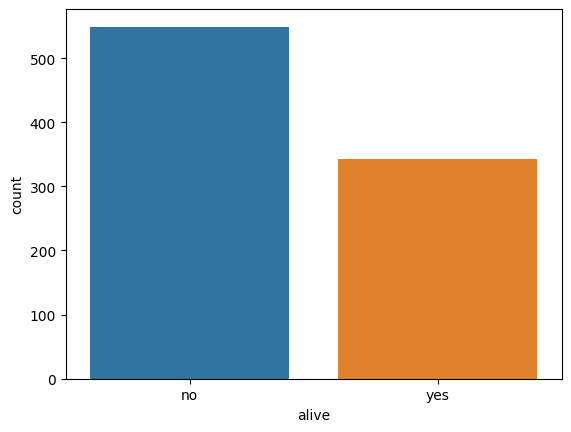

In [ ]:
sns.countplot(x='alive',data=titanic_data)
plt.show()

In [ ]:
titanic_data['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

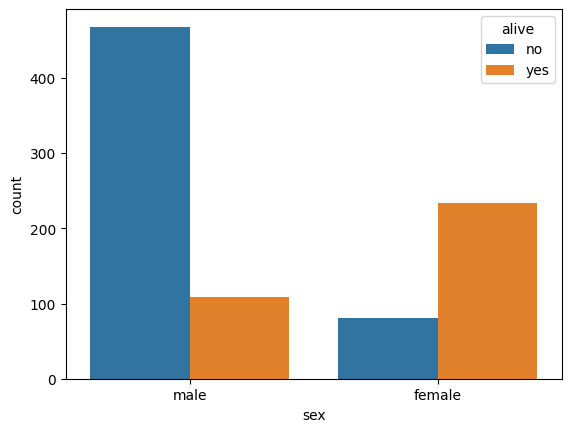

In [ ]:
sns.countplot(x='sex',hue='alive',data=titanic_data)
plt.show()

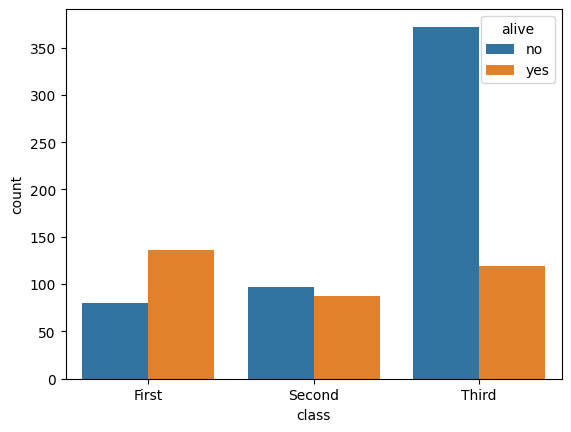

In [ ]:
sns.countplot(x='class',hue='alive',data=titanic_data)
plt.show()

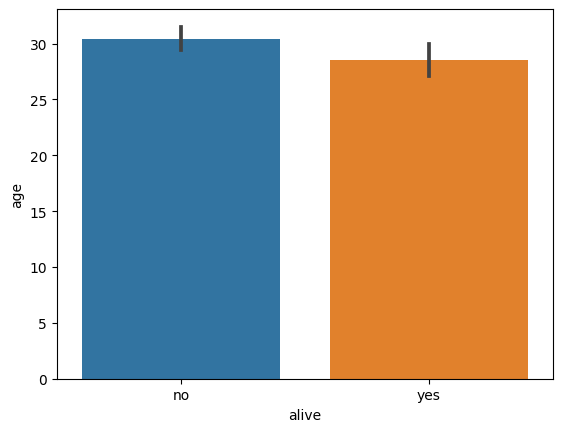

In [ ]:
sns.barplot(x='alive',y='age',data=titanic_data)
plt.show()

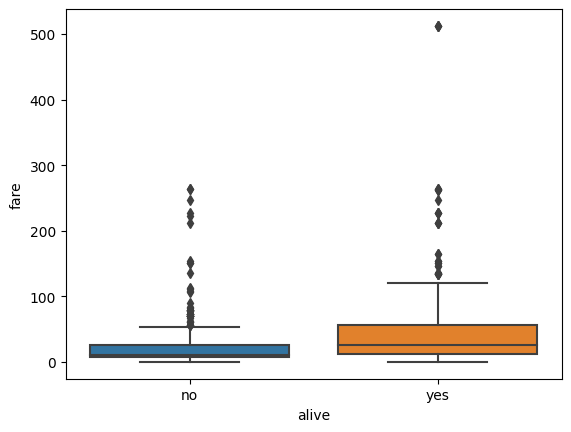

In [ ]:
sns.boxplot(x='alive',y='fare',data=titanic_data)
plt.show()

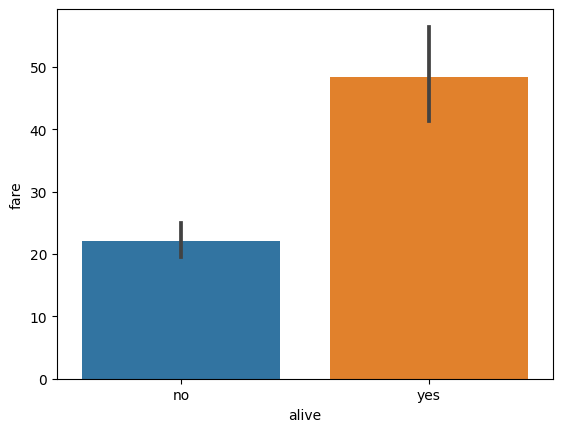

In [ ]:
sns.barplot(x='alive',y='fare',data=titanic_data)
plt.show()

In [ ]:
titanic_data["sex"]=titanic_data["sex"].replace({"male":0,"female":1})

In [ ]:
titanic_data["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
titanic_data["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [ ]:
titanic_data["embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
titanic_data["class"]=titanic_data["class"].replace({"First":0,"Second":1,"Third":2})
titanic_data["embarked"]=titanic_data["embarked"].replace({"S":0,"C":1,"Q":2})
titanic_data["embark_town"]=titanic_data["embark_town"].replace({"Southampton":0,"Cherbourg":1,"Queenstown":2})

In [ ]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,2,man,True,0,no,False
1,1,1,1,38.0,1,0,71.2833,1,0,woman,False,1,yes,False
2,1,3,1,26.0,0,0,7.9250,0,2,woman,False,0,yes,True
3,1,1,1,35.0,1,0,53.1000,0,0,woman,False,0,yes,False
4,0,3,0,35.0,0,0,8.0500,0,2,man,True,0,no,True


In [ ]:
x=titanic_data.drop(["survived","who","adult_male","alive","alone"],axis=1)
y=titanic_data["survived"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
model.score(X_test,y_test)

0.7988826815642458

In [ ]:
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[89, 16],
       [20, 54]])

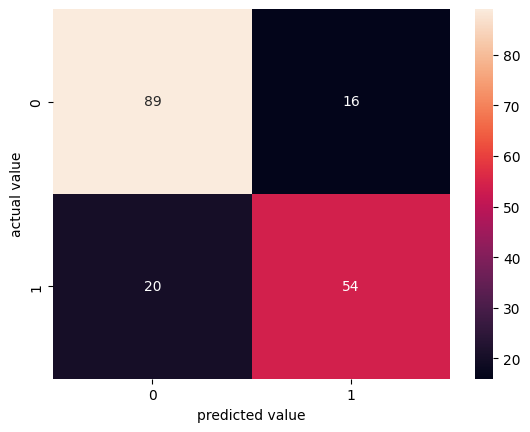

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        70

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

